In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\Shrivi\COMP316 Project\IMDB 50K Sentiment Reviews\IMDB Dataset.csv')

In [3]:
# Before going any further, we should get a feel for the data that we're going to be using
data.shape

(50000, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

<AxesSubplot:>

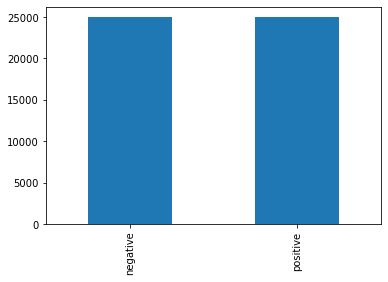

In [7]:
# Displaying the above information graphically
import matplotlib.pyplot as plt

data['sentiment'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='sentiment'>

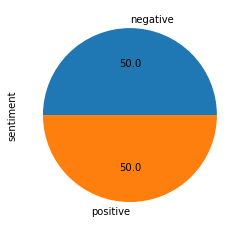

In [8]:
data['sentiment'].value_counts().plot(kind = 'pie', autopct = '%.1f')

In [9]:
# Now that we know what our data looks like, its time to clean it up...
# I'm going to do the cleaning of data on a copy of the data variable and add it back to the table later

clean_data = data
print("Before cleaning: [This is the second review]")
clean_data['review'][1]

Before cleaning: [This is the second review]


'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [10]:
# To remove html tags i will be using beautiful soup as it has some handy methods for this type of job

from bs4 import BeautifulSoup as bs

def remove_html_tags(text):
    soup = bs(text,'html.parser')
    cleaned = soup.get_text()
    return cleaned

clean_data['review'] = clean_data['review'].apply(remove_html_tags)
print("After removing HTML tags: [This is still the second review]")
clean_data['review'][1]

After removing HTML tags: [This is still the second review]


'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [11]:
# Now we use some good old REGEX to remove any extra symbols and all non-alphabetic values

import re

def remove_non_alpha(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\[[^]]*\]', ' ', text)
    return text

clean_data['review'] = clean_data['review'].apply(remove_non_alpha)
print("After removing extra symbols and non-alphabetic values: [This is still the second review]")
clean_data['review'][1]

After removing extra symbols and non-alphabetic values: [This is still the second review]


'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [12]:
# Now we can remove stop words (Words that have no sentiment)

import nltk
from nltk.corpus import stopwords

def remove_stopWords(text):
    sentence_without_stopWords = []
    
    # We basically break down the the entire review into words and then check if those individual words are stopwords or not 
    text = text.split() 
    for i in text:
        if i not in stopwords.words('english'):
            sentence_without_stopWords.append(i)
    return sentence_without_stopWords

clean_data['review'] = clean_data['review'].apply(remove_stopWords)
print("After removing StopWords: [This is still the second review]")
clean_data['review'][1]

After removing StopWords: [This is still the second review]


['A',
 'wonderful',
 'little',
 'production',
 'The',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'BBC',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'The',
 'actors',
 'extremely',
 'well',
 'chosen',
 'Michael',
 'Sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'You',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'Williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'A',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'The',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'It',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'Orton',
 'Halliwell',
 'sets',
 'particularly',
 'flat',
 'Halliwell',
 'murals',
 'decorating',
 

In [13]:
# Now we lemmatize the words and join them back together

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def join(text):
    text=" ".join(text)
    return text

def lemmatizing_words(text):
    text = [lemmatizer.lemmatize(word) for word  in text]
    text = join(text)
    return text

clean_data['review'] = clean_data['review'].apply(lemmatizing_words)
print("After joining and using lemmatization on the words: [This is still the second review]")
clean_data['review'][1]

After joining and using lemmatization on the words: [This is still the second review]


'A wonderful little production The filming technique unassuming old time BBC fashion give comforting sometimes discomforting sense realism entire piece The actor extremely well chosen Michael Sheen got polari voice pat You truly see seamless editing guided reference Williams diary entry well worth watching terrificly written performed piece A masterful production one great master comedy life The realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears It play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwell mural decorating every surface terribly well done'

In [14]:
# Converting all the reviews to lower case letters 

def to_lower_case(text):
    return text.lower()

clean_data['review'] = clean_data['review'].apply(to_lower_case)
print("After converting all letters to lower case: [This is still the second review]")
clean_data['review'][1]

After converting all letters to lower case: [This is still the second review]


'a wonderful little production the filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece the actor extremely well chosen michael sheen got polari voice pat you truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece a masterful production one great master comedy life the realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears it play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

In [15]:
# The data cleaning is complete. Now we make a comparison between the cleaned data and the raw data

data = pd.read_csv(r'C:\Users\Shrivi\COMP316 Project\IMDB 50K Sentiment Reviews\IMDB Dataset.csv')
data['Cleaned_review'] = clean_data['review']
data.head(10)

,review,sentiment,Cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,positive,i sure would like see resurrection dated seahu...
7,"This show was an amazing, fresh & innovative i...",negative,this show amazing fresh innovative idea first ...
8,Encouraged by the positive comments about this...,negative,encouraged positive comment film i looking for...
9,If you like original gut wrenching laughter yo...,positive,if like original gut wrenching laughter like m...


In [17]:
X = clean_data['review']

In [18]:
# Now we change sentiment value of 'positive' == 1 and 'negative' == 0

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
clean_data['sentiment Numeric value'] = lb_make.fit_transform(clean_data['sentiment'])
y = clean_data['sentiment Numeric value']
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment Numeric value, Length: 50000, dtype: int32

In [19]:
# Now we can split the data into training(80%) and testing(20%) set.
# Note the data is shuffled by default (i.e. default: shuffle=True)
# Note we don't shuffle the data again as its has been done already and ensures both models are trained/tested in same way

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

Training set information


1    20064
0    19936
Name: sentiment Numeric value, dtype: int64

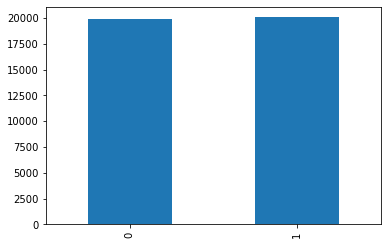

In [20]:
# Before we start fitting the model, it'll be nice to know some graphical data about the training set

print("Training set information")
y_train.value_counts().sort_index().plot.bar()
y_train.value_counts()


In Pie chart Display: 


<AxesSubplot:ylabel='sentiment Numeric value'>

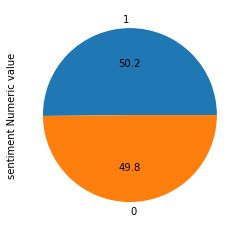

In [21]:
print("In Pie chart Display: ")
y_train.value_counts().plot(kind = 'pie', autopct = '%.1f')

In [26]:
# we need to convert text into vectors using countvectorizer, so we need to convert them to an array
c_train = []
c_test  = []

for i in X_train.index:
    review = X_train[i]
    c_train.append(review)

for j in X_test.index:
    review = X_test[j]
    c_test.append(review)

c_train_backup = c_train[]
c_test_backup = c_test[]

In [27]:
# Now we can convert the corpus data into vectors
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_train = cv.fit_transform(c_train)
cv_test = cv.transform(c_test)

In [29]:
# Now we can fit the model using MNB classifier

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(cv_train,y_train)


In [30]:
# Now we test the model against the test set
y_pred = model.predict(cv_test)

In [31]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n',CM)

print('\nTrue Positives(TP) = ', CM[0,0])

print('\nTrue Negatives(TN) = ', CM[1,1])

print('\nFalse Positives(FP) = ', CM[0,1])

print('\nFalse Negatives(FN) = ', CM[1,0])

confusionMatrix = CM # This is used in next step

Confusion matrix

 [[4422  642]
 [ 796 4140]]

True Positives(TP) =  4422

True Negatives(TN) =  4140

False Positives(FP) =  642

False Negatives(FN) =  796


<AxesSubplot:>

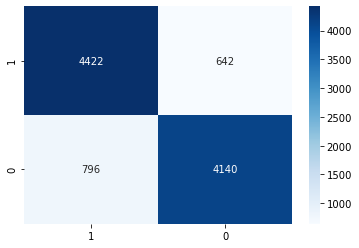

In [32]:
# Now we visualize the confusion matrix

import seaborn as sns

# The below code was available Publicly.
# 
cm_matrix = pd.DataFrame(data=CM, columns=['1', '0'], 
                                 index=['1', '0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


print(classification_report(y_test,y_pred))
print("FINAL ACCURACY SCORE WITH MNB IS: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      5064
           1       0.87      0.84      0.85      4936

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

FINAL ACCURACY SCORE WITH MNB IS:  0.8562


In [34]:
# Now we can train and test the model using support vector classifier
cv1 = CountVectorizer()
cv_train1 = cv1.fit_transform(c_train)
cv_test1 = cv1.transform(c_test)

In [36]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(C=0.5,random_state=42,max_iter=10000)
lin_svc.fit(cv_train1,y_train)

y_pred1 = lin_svc.predict(cv_test1)

In [39]:
CM1 = confusion_matrix(y_test,y_pred1)
print('Confusion matrix\n\n',CM)

print('\nTrue Positives(TP) = ', CM1[0,0])

print('\nTrue Negatives(TN) = ', CM1[1,1])

print('\nFalse Positives(FP) = ', CM1[0,1])

print('\nFalse Negatives(FN) = ', CM1[1,0])

confusionMatrix1 = CM1 # This is used in next step

Confusion matrix

 [[4422  642]
 [ 796 4140]]

True Positives(TP) =  4376

True Negatives(TN) =  4325

False Positives(FP) =  688

False Negatives(FN) =  611


<AxesSubplot:>

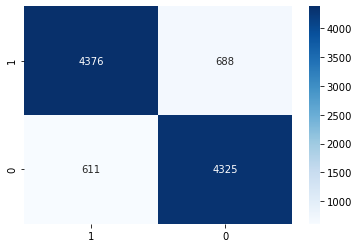

In [38]:
# Now we visualize the confusion matrix

import seaborn as sns

# The below code was available Publicly.
# 
cm_matrix1 = pd.DataFrame(data=CM1, columns=['1', '0'], 
                                 index=['1', '0'])

sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='Blues')

In [40]:
print(classification_report(y_test,y_pred1))
print("FINAL ACCURACY SCORE WITH LINEAR SVC IS: ",accuracy_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      5064
           1       0.86      0.88      0.87      4936

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

FINAL ACCURACY SCORE WITH LINEAR SVC IS:  0.8701


In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(cv_train1,y_train)
y_pred2 = lr.predict(cv_test1)

In [42]:
CM2 = confusion_matrix(y_test,y_pred2)
print('Confusion matrix\n\n',CM2)

print('\nTrue Positives(TP) = ', CM2[0,0])

print('\nTrue Negatives(TN) = ', CM2[1,1])

print('\nFalse Positives(FP) = ', CM2[0,1])

print('\nFalse Negatives(FN) = ', CM2[1,0])

confusionMatrix2 = CM2 # This is used in next step

Confusion matrix

 [[4453  611]
 [ 549 4387]]

True Positives(TP) =  4453

True Negatives(TN) =  4387

False Positives(FP) =  611

False Negatives(FN) =  549


<AxesSubplot:>

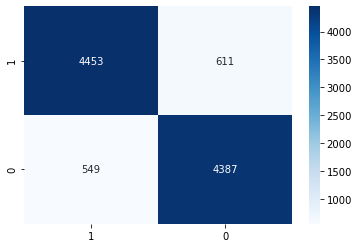

In [43]:
# Now we visualize the confusion matrix

import seaborn as sns

# The below code was available Publicly.
# 
cm_matrix2 = pd.DataFrame(data=CM2, columns=['1', '0'], 
                                 index=['1', '0'])

sns.heatmap(cm_matrix2, annot=True, fmt='d', cmap='Blues')

In [46]:
print(classification_report(y_test,y_pred2))
print("FINAL ACCURACY SCORE WITH  Logistic Regression IS: ",accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      5064
           1       0.88      0.89      0.88      4936

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

FINAL ACCURACY SCORE WITH  Logistic Regression IS:  0.884
